<a href="https://colab.research.google.com/github/avneesh-nolkha/EVA5/blob/master/Session8/EVA5_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/smitasasindran/eva5utils.git

Cloning into 'eva5utils'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 38 (delta 5), reused 27 (delta 1), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [2]:
%cd eva5utils

/content/eva5utils


In [3]:
!ls

config	dataloaders  main.py  model  test  train  transforms  utils


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


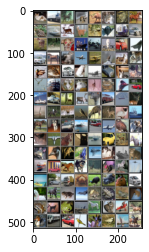

In [4]:
from model import Model7, ResNet18
from utils.helpers import show_model_summary, DEVICE, IS_CUDA, accuracy_per_class
from dataloaders import dataloaders
from transforms import model7_transforms
from utils import plot_samples
from train import train_loop
from test import test_loop
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from utils.helpers import accuracy_per_class

model = ResNet18()
show_model_summary(model.to(DEVICE), (3, 32, 32))

# Constants, put in config
epochs = 100
cuda_batch_size=128
cpu_batch_size = 4
num_workers = 4

transforms = model7_transforms()
(train_loader, test_loader, classes) = dataloaders.load_cifar10(transforms, cuda_batch_size, cpu_batch_size, num_workers)

plot_samples(train_loader)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=30, gamma=.1)

In [5]:
train_loop(epochs, train_loader, model, DEVICE, optimizer, criterion, scheduler)

[1,   391] loss: 726.945
[2,   391] loss: 552.026
[3,   391] loss: 454.222
[4,   391] loss: 384.926
[5,   391] loss: 333.415
[6,   391] loss: 297.568
[7,   391] loss: 266.823
[8,   391] loss: 239.357
[9,   391] loss: 213.440
[10,   391] loss: 194.803
[11,   391] loss: 176.609
[12,   391] loss: 162.602
[13,   391] loss: 149.805
[14,   391] loss: 139.368
[15,   391] loss: 127.073
[16,   391] loss: 120.654
[17,   391] loss: 113.551
[18,   391] loss: 103.836
[19,   391] loss: 98.187
[20,   391] loss: 90.199
[21,   391] loss: 84.970
[22,   391] loss: 80.153
[23,   391] loss: 74.712
[24,   391] loss: 69.885
[25,   391] loss: 66.117
[26,   391] loss: 60.056
[27,   391] loss: 58.625
[28,   391] loss: 53.869
[29,   391] loss: 50.401
[30,   391] loss: 47.789
[31,   391] loss: 25.771
[32,   391] loss: 19.787
[33,   391] loss: 17.006
[34,   391] loss: 15.449
[35,   391] loss: 14.421
[36,   391] loss: 12.981
[37,   391] loss: 12.297
[38,   391] loss: 12.107
[39,   391] loss: 10.306
[40,   391] loss

In [6]:
test_loop(test_loader, model, DEVICE, criterion)
accuracy_per_class(model, classes, test_loader, DEVICE)

Accuracy of the network on the 10000 test images: 91 %, Test loss: 34.67791635543108
Accuracy of plane : 96 %
Accuracy of   car : 93 %
Accuracy of  bird : 97 %
Accuracy of   cat : 80 %
Accuracy of  deer : 93 %
Accuracy of   dog : 84 %
Accuracy of  frog : 93 %
Accuracy of horse : 100 %
Accuracy of  ship : 88 %
Accuracy of truck : 93 %
